#**Payments & Products Analysis**

1. Study the distribution of payment types and their impact on deal success.
2. Analyze the popularity and success of different products and training types.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import plotly.express as px
import seaborn as sns

In [ ]:
pd.set_option('display.max_columns', None) #display all columns (so that they are not hidden with «…»)

In [ ]:
deals = pd.read_pickle("deals_df.pkl")

In [ ]:
deals.head()

,Id,Deal Owner Name,Closing Date,Quality,Stage,Lost Reason,Campaign,SLA,Content,Term,Source,Payment Type,Product,Education Type,Created Time,Course duration,Months of study,Initial Amount Paid,Offer Total Amount,Contact Name,City,Level of Deutsch,_open_deal,Payment Category,Offer Category,_SLA_hours
0,5805028000056864695,Ben Hall,NaT,Unknown,New Lead,Unknown,03.07.23women,0 days 00:00:00,v16,women,Facebook Ads,Unknown,Unknown,Unknown,2024-06-21 15:30:00,0,0,NaN,NaN,5805028000056849495,Unknown,Unknown,True,Unknown,Unknown,0.000000
1,5805028000056859489,Ulysses Adams,NaT,Unknown,New Lead,Unknown,Unknown,0 days 00:00:00,Unknown,Unknown,Organic,Unknown,Web Developer,Morning,2024-06-21 15:23:00,6,0,0.0,2000.0,5805028000056834471,Unknown,Unknown,True,No Payment,Regular Offer,0.000000
2,5805028000056832357,Ulysses Adams,2024-06-21,D - Non Target,Lost,Non target,engwien_AT,0 days 00:26:43,b1-at,21_06_2024,Telegram posts,Unknown,Unknown,Unknown,2024-06-21 14:45:00,0,0,NaN,NaN,5805028000056854421,Unknown,Unknown,False,Unknown,Unknown,0.445278
3,5805028000056824246,Eva Kent,2024-06-21,E - Non Qualified,Lost,Invalid number,04.07.23recentlymoved_DE,0 days 01:00:03.999999999,bloggersvideo14com,recentlymoved,Facebook Ads,Unknown,Unknown,Unknown,2024-06-21 13:32:00,0,0,NaN,NaN,5805028000056889351,Unknown,Unknown,False,Unknown,Unknown,1.001111
4,5805028000056873292,Ben Hall,2024-06-21,D - Non Target,Lost,Non target,discovery_DE,0 days 00:53:12.000000001,website,Unknown,Google Ads,Unknown,Unknown,Unknown,2024-06-21 13:21:00,0,0,NaN,NaN,5805028000056876176,Unknown,Unknown,False,Unknown,Unknown,0.886667


### **1. Payment Types — Distribution and Succes**

In [ ]:
# Filter (remove Unknown)
filtered_deals = deals[(deals['Payment Type'].astype(str) != 'Unknown')]

In [ ]:
# Calculate total and successful deals
total_payments = filtered_deals.groupby('Payment Type', observed=True)['Id'].nunique().reset_index(name='Total Deals')
successful_payments = filtered_deals[filtered_deals['Stage'] == 'Payment Done'] \
    .groupby('Payment Type', observed=True)['Id'].nunique().reset_index(name='Successful Deals')

In [ ]:
payment_perf = pd.merge(total_payments, successful_payments, on='Payment Type', how='left')
payment_perf['Successful Deals'] = payment_perf['Successful Deals'].fillna(0)
payment_perf['Unsuccessful Deals'] = payment_perf['Total Deals'] - payment_perf['Successful Deals']
payment_perf['Conversion Rate'] = (payment_perf['Successful Deals'] / payment_perf['Total Deals'] * 100).round(1)
payment_perf = payment_perf.sort_values('Total Deals', ascending=False)

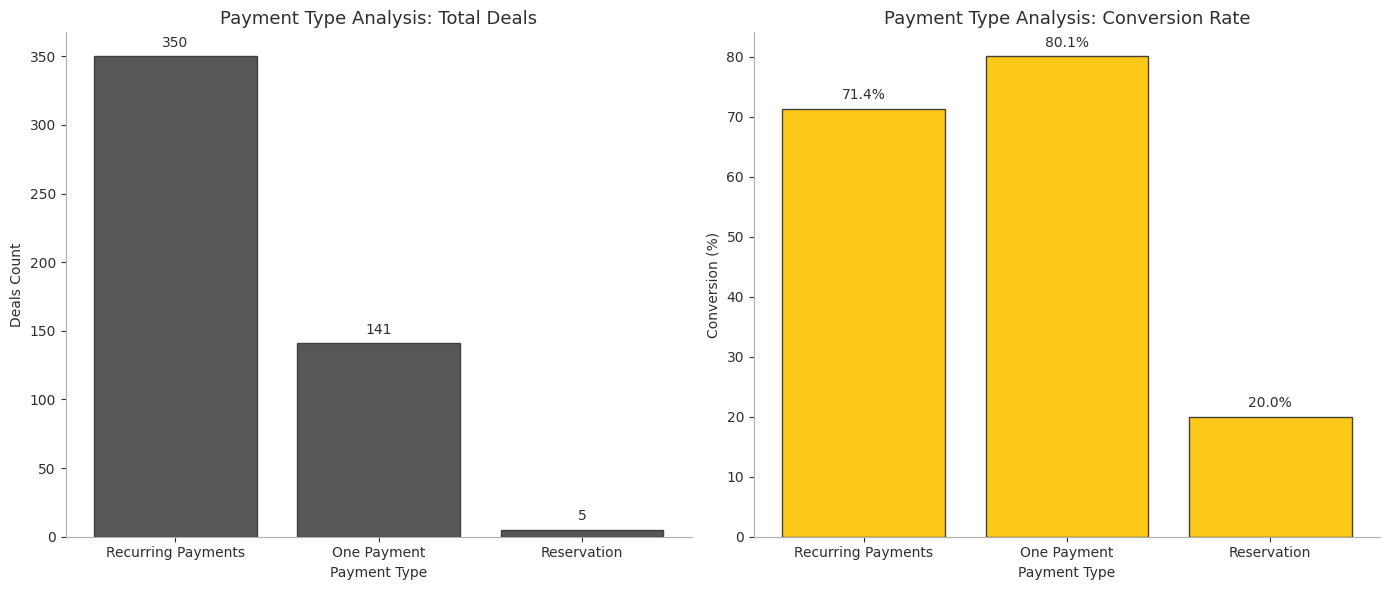

,Payment Type,Total Deals,Successful Deals,Unsuccessful Deals,Conversion Rate
1,Recurring Payments,350,250,100,71.4
0,One Payment,141,113,28,80.1
2,Reservation,5,1,4,20.0


In [ ]:

palette = {
    "grey": "#3A3A3A",     # Total Deals
    "yellow": "#FFC300",   # Conversion Rate
    "line": "#B0B0B0",
    "char": "#2E2E2E",
    "bg": "white"
}

fig, axs = plt.subplots(1, 2, figsize=(14, 6), facecolor=palette["bg"])

#Bar 1: deals
axs[0].bar(payment_perf['Payment Type'], payment_perf['Total Deals'],
           color=palette["grey"], alpha=0.85, edgecolor=palette["char"])
axs[0].set_title('Payment Type Analysis: Total Deals', fontsize=13, color=palette["char"])
axs[0].set_xlabel('Payment Type', color=palette["char"])
axs[0].set_ylabel('Deals Count', color=palette["char"])

for i, v in enumerate(payment_perf['Total Deals']):
    axs[0].text(i, v + max(payment_perf['Total Deals']) * 0.02,
                f'{int(v)}', ha='center', fontsize=10, color=palette["char"])

# Bar 2: Conversion
axs[1].bar(payment_perf['Payment Type'], payment_perf['Conversion Rate'],
           color=palette["yellow"], alpha=0.9, edgecolor=palette["char"])
axs[1].set_title('Payment Type Analysis: Conversion Rate', fontsize=13, color=palette["char"])
axs[1].set_xlabel('Payment Type', color=palette["char"])
axs[1].set_ylabel('Conversion (%)', color=palette["char"])

for i, v in enumerate(payment_perf['Conversion Rate']):
    axs[1].text(i, v + max(payment_perf['Conversion Rate']) * 0.02,
                f'{v:.1f}%', ha='center', fontsize=10, color=palette["char"])

for ax in axs:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_color(palette["line"])
    ax.spines['bottom'].set_color(palette["line"])
    ax.tick_params(colors=palette["char"])
    ax.grid(False)

plt.tight_layout()
plt.show()

payment_perf


### Key Observations
**Повторяющиеся платежи (recurring payments)** — доминирующий способ оплаты: 350 сделок при конверсии 71,4%.  
- **Единоразовая оплата (one payment)** — показывает **наивысшую конверсию** (80,1%), но при меньшем объёме (141 сделка).  
- **Бронирование (reservation)** — практически не используется (5 сделок, конверсия 20%).  

### Insights
- Основной спрос приходится на **recurring payments**, что подтверждает доверие клиентов к долгосрочному обучению.  
- Высокая конверсия **one payment** говорит о важности наличия этого варианта для гибкости.  
- Формат **reservations** неэффективен — низкий объём и слабая конверсия.  
### Recommendations
- Сделать упор на продвижение **recurring payments** как основного бизнес-моделя.  
- Сохранить **one payment** как дополнительный привлекательный вариант для клиентов.  
- Рассмотреть возможность отказа от **reservations** или трансформацию этого формата.


###**2. Products & Education Types**

In [ ]:
# Remove Unknown
filtered_deals = deals[deals['Product'].astype(str) != 'Unknown']

In [ ]:
# Calculate total / success by products
total_products = filtered_deals.groupby('Product', observed=True)['Id'].nunique().reset_index(name='Total Deals')
successful_products = filtered_deals[filtered_deals['Stage'] == 'Payment Done'] \
    .groupby('Product', observed=True)['Id'].nunique().reset_index(name='Successful Deals')

In [ ]:
product_perf = pd.merge(total_products, successful_products, on='Product', how='left')
product_perf['Successful Deals'] = product_perf['Successful Deals'].fillna(0)
product_perf['Conversion Rate'] = (product_perf['Successful Deals'] / product_perf['Total Deals'] * 100).round(1)
product_perf = product_perf.sort_values('Total Deals', ascending=False)

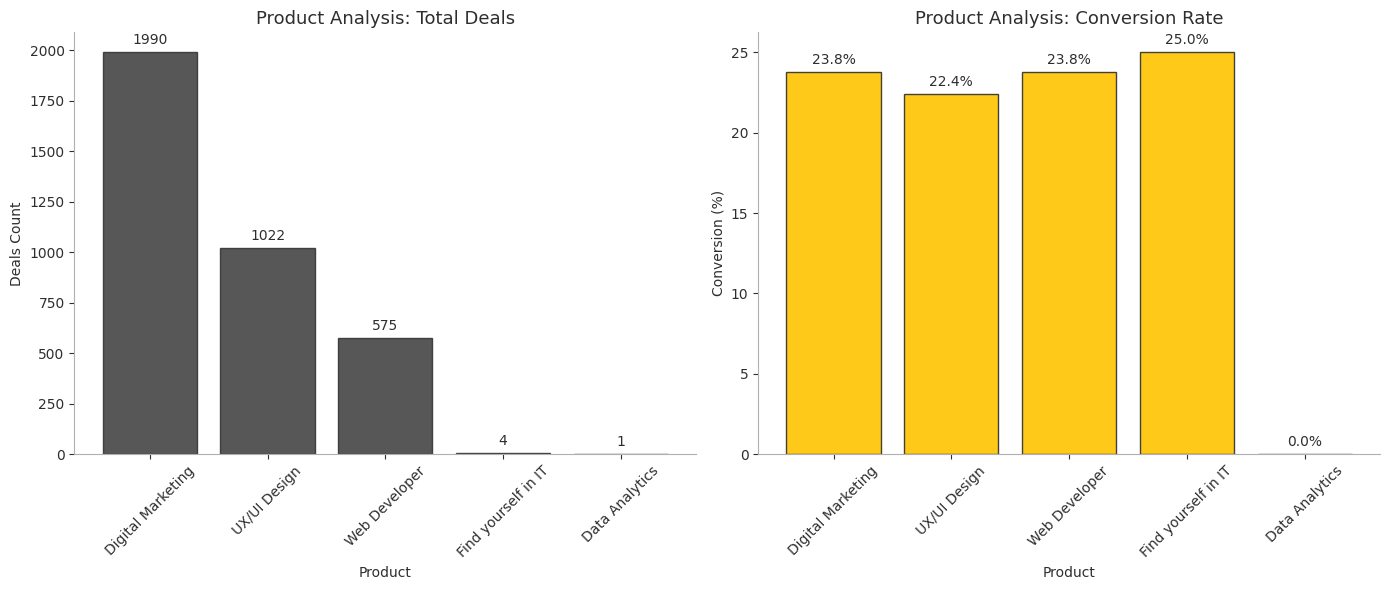

,Product,Total Deals,Successful Deals,Conversion Rate
1,Digital Marketing,1990,474.0,23.8
3,UX/UI Design,1022,229.0,22.4
4,Web Developer,575,137.0,23.8
2,Find yourself in IT,4,1.0,25.0
0,Data Analytics,1,0.0,0.0


In [ ]:
palette = {
    "grey": "#3A3A3A",     # Total Deals
    "yellow": "#FFC300",   # Conversion Rate
    "line": "#B0B0B0",
    "char": "#2E2E2E",
    "bg": "white"
}

fig, axs = plt.subplots(1, 2, figsize=(14, 6), facecolor=palette["bg"])

# Bar 1: Total Deals
bars = axs[0].bar(product_perf['Product'], product_perf['Total Deals'],
                  color=palette["grey"], alpha=0.85, edgecolor=palette["char"])
axs[0].set_title('Product Analysis: Total Deals', fontsize=13, color=palette["char"])
axs[0].set_xlabel('Product', color=palette["char"])
axs[0].set_ylabel('Deals Count', color=palette["char"])
axs[0].tick_params(axis='x', rotation=45, colors=palette["char"])
axs[0].tick_params(axis='y', colors=palette["char"])

for bar in bars:
    h = bar.get_height()
    axs[0].text(bar.get_x() + bar.get_width()/2, h + max(product_perf['Total Deals']) * 0.02,
                f'{int(h)}', ha='center', fontsize=10, color=palette["char"])

#Bar 2: Conversion Rate
bars2 = axs[1].bar(product_perf['Product'], product_perf['Conversion Rate'],
                   color=palette["yellow"], alpha=0.9, edgecolor=palette["char"])
axs[1].set_title('Product Analysis: Conversion Rate', fontsize=13, color=palette["char"])
axs[1].set_xlabel('Product', color=palette["char"])
axs[1].set_ylabel('Conversion (%)', color=palette["char"])
axs[1].tick_params(axis='x', rotation=45, colors=palette["char"])
axs[1].tick_params(axis='y', colors=palette["char"])

for bar in bars2:
    h = bar.get_height()
    axs[1].text(bar.get_x() + bar.get_width()/2, h + max(product_perf['Conversion Rate']) * 0.02,
                f'{h:.1f}%', ha='center', fontsize=10, color=palette["char"])

for ax in axs:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_color(palette["line"])
    ax.spines['bottom'].set_color(palette["line"])
    ax.grid(False)

plt.tight_layout()
plt.show()

display(product_perf)


### Key Observations
- Лидирует продукт **Digital Marketing** — 1 990 сделок, конверсия 23,8%.  
- **UX/UI Design** (1 022 сделки, конверсия 22,4%) и **Web Development** (575 сделок, конверсия 23,8%) также показывают стабильные результаты.  
- Нишевые продукты (**Find Yourself in IT**, **Data Analytics**) имеют крайне малый объём.

### Insights
- Портфель продуктов **сильно сконцентрирован**: Digital Marketing формирует около 60% всех сделок.  
- Конверсии по основным продуктам находятся в одном диапазоне (22–25%).  
- Нишевые направления пока не находят отклика у аудитории.  

### Recommendations
- Усилить продвижение **UX/UI Design** и **Web Development** как перспективных направлений.  
- Провести аудит нишевых продуктов: доработать или вывести из портфеля.


###**3. Education Type × Product (Heatmap)**

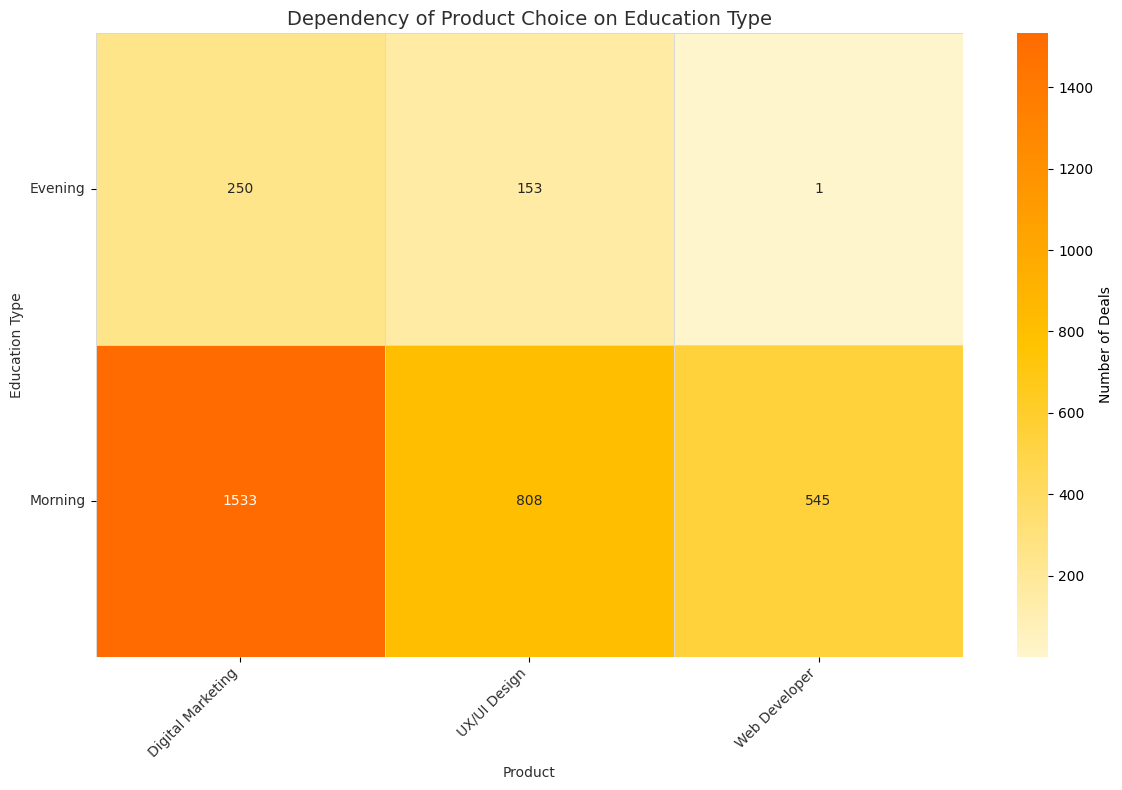

In [ ]:
edu_deals = deals[(deals['Product'].astype(str) != 'Unknown') & (deals['Education Type'] != 'Unknown')]

heatmap_data = edu_deals.groupby(['Education Type','Product'], observed=True).size().unstack(fill_value=0)

plt.figure(figsize=(12,8))

orange_cmap = mcolors.LinearSegmentedColormap.from_list("orange_scale", ["#FFF5CC", "#FFC300", "#FF6B00"])

sns.heatmap(
    heatmap_data,
    annot=True, fmt='d',
    cmap=orange_cmap,
    cbar_kws={'label': 'Number of Deals'},
    linewidths=0.7, linecolor="#D9D9D9")

plt.title("Dependency of Product Choice on Education Type", fontsize=14, color="#2E2E2E")
plt.xlabel("Product", color="#2E2E2E")
plt.ylabel("Education Type", color="#2E2E2E")
plt.xticks(rotation=45, ha='right', color="#2E2E2E")
plt.yticks(rotation=0, color="#2E2E2E")

plt.gca().spines[:].set_visible(False)
plt.tight_layout()
plt.show()




### Key Observations
- **Утренние курсы** доминируют по всем продуктам:  
  - Digital Marketing — 1 533 сделки  
  - UX/UI Design — 808 сделок  
  - Web Development — 545 сделок  
- **Вечерние курсы** показывают значительно меньшие результаты (например, Web Development — всего 1 сделка).  


### Insights
- Утренние программы являются **основным источником дохода** и успешных сделок.  
- Вечерние программы существенно отстают, особенно по направлению **Web Development**.

### Recommendations
- Активнее продвигать **вечерние курсы** как решение для занятых специалистов (гибкость, смена профессии).  
- Пересмотреть формат и расписание вечерних занятий для повышения привлекательности.  
- Сохранять приоритет на **утренних курсах**, как на ключевом драйвере продаж.  